In [1]:
import pandas as pd
from scraper import SilverScraper
from collections import defaultdict

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns
%matplotlib inline

In [2]:
s = SilverScraper()
s.populate()

found 47 worksheets
1 / 47: WorksheetGenerator.php?EventReferenceNumber=2016-09-10-Zabel-Katelyn-421K&MusicianID=ChrisMcCarthy&SiD=61915660 
2 / 47: WorksheetGenerator.php?EventReferenceNumber=2017-09-17-Butler-Dana-4QWB&MusicianID=ChrisMcCarthy&SiD=61915660 
3 / 47: WorksheetGenerator.php?EventReferenceNumber=2016-10-01-Summerfield-Jason-4R36&MusicianID=ChrisMcCarthy&SiD=61915660 
4 / 47: WorksheetGenerator.php?EventReferenceNumber=2016-10-15-Helliwell-Lauren-3XWV&MusicianID=ChrisMcCarthy&SiD=61915660 
5 / 47: WorksheetGenerator.php?EventReferenceNumber=2016-11-08-Showcase-4q32&MusicianID=ChrisMcCarthy&SiD=61915660 
6 / 47: WorksheetGenerator.php?EventReferenceNumber=2017-06-03-Aleksich-Matthew-4P76&MusicianID=ChrisMcCarthy&SiD=61915660 
7 / 47: WorksheetGenerator.php?EventReferenceNumber=2017-07-15-Bogen-Julie-4FNC&MusicianID=ChrisMcCarthy&SiD=61915660 
8 / 47: WorksheetGenerator.php?EventReferenceNumber=2017-09-02-Loughlin-Juliette-53NR&MusicianID=ChrisMcCarthy&SiD=61915660 
9 / 47:

In [3]:
print(f'Scraped {len(s.setlists)} setlists')

Scraped 58 setlists


In [4]:
'SetListGenerator.php?LeadSingerID=DarrenFewins&MusicianID=ChrisMcCarthy&SiD=61915660' in s.setlists

True

In [5]:
len(s.setlists['SetListGenerator.php?LeadSingerID=DarrenFewins&MusicianID=ChrisMcCarthy&SiD=61915660'])

70

In [6]:
song_dict = defaultdict(int)

In [7]:
for setlist, song_list in s.setlists.items():
    for song in song_list:
        song_dict[song] += 1

In [8]:
df = pd.Series(song_dict).to_frame().reset_index()
df.columns = ['song', 'counts']
df.head()

,song,counts
0,cant stop the feeling,3
1,justin bieber,1
2,rock with you,15
3,never too much,1
4,love never felt so good,4


In [12]:
top_50 = df.sort_values('counts', ascending=False).head(50)
top_50.head()

,song,counts
214,i want you back,27
271,at last,24
224,superstition,23
225,valerie,23
234,forget you,22


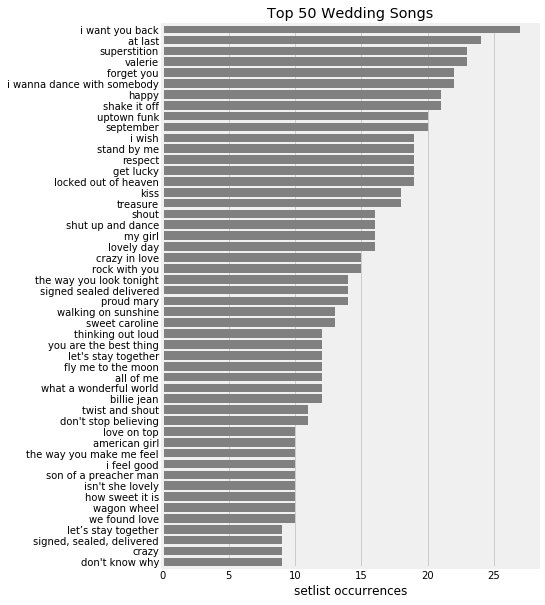

In [13]:
fig, ax = plt.subplots()
fig.set_figheight(10)
sns.barplot(data=top_50, x='counts', y='song', ax=ax, color='gray')
plt.title('Top 50 Wedding Songs')
plt.ylabel('')
plt.xlabel('setlist occurrences')
plt.savefig('top_chart.png',  bbox_inches='tight')

In [17]:
top_50['song'].to_csv('top_50_songs.csv', index=False, header=False)